In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

file = "C:/Users/icanhearme/Downloads/Data Science Boot Camp/HW Assignments/project 4/train.csv"

flight_df= pd.read_csv(file)
flight_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
flight_df = flight_df.drop(columns=['id', 'Unnamed: 0', 'Class', 'Type of Travel'])

dummy_df = pd.get_dummies(flight_df)

dummy_df.head()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,False,True,True,False,True,False
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,False,True,False,True,True,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,True,False,True,False,False,True
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,True,False,True,False,True,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,False,True,True,False,False,True


In [3]:
# dummy_df = dummy_df.drop(columns=['satisfaction_neutral or dissatisfied', 'Gender_Male'])

dummy_df["Gender_Male"] = dummy_df["Gender_Male"].astype(int)
dummy_df["Gender_Female"] = dummy_df["Gender_Female"].astype(int)

dummy_df["satisfaction_satisfied"] = dummy_df["satisfaction_satisfied"].astype(int)
dummy_df["satisfaction_neutral or dissatisfied"] = dummy_df["satisfaction_neutral or dissatisfied"].astype(int)

dummy_df["Customer Type_Loyal Customer"] = dummy_df["Customer Type_Loyal Customer"].astype(int)
dummy_df["Customer Type_disloyal Customer"] = dummy_df["Customer Type_disloyal Customer"].astype(int)

dummy_df = dummy_df.drop(columns='satisfaction_neutral or dissatisfied')
dummy_df = dummy_df.rename(columns={
    'satisfaction_satisfied': 'satisfaction'
})

dummy_df = dummy_df.drop(columns='Customer Type_disloyal Customer')

dummy_df = dummy_df.dropna()
# dummy_df = dummy_df.head(1000)

dummy_df.head()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,satisfaction
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,18.0,0,1,1,0
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,6.0,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0.0,1,0,1,1
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,9.0,1,0,1,0
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,0.0,0,1,1,1


In [4]:
from sklearn.model_selection import train_test_split

#  Split our preprocessed data into our features and target arrays
X = dummy_df.drop(columns='satisfaction')
y = dummy_df["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y) 

In [5]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:

number_input_features = len(dummy_df.columns)-1
number_input_features
# X_train_scaled.shape[0]
hidden_nodes_layer1 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)



In [7]:
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                220       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [8]:

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
2428/2428 [==============================] - 2s 624us/step - loss: 0.3853 - accuracy: 0.8311
Epoch 2/100
2428/2428 [==============================] - 2s 631us/step - loss: 0.2708 - accuracy: 0.8860
Epoch 3/100
2428/2428 [==============================] - 2s 627us/step - loss: 0.2479 - accuracy: 0.8960
Epoch 4/100
2428/2428 [==============================] - 2s 632us/step - loss: 0.2389 - accuracy: 0.9003
Epoch 5/100
2428/2428 [==============================] - 2s 623us/step - loss: 0.2325 - accuracy: 0.9033
Epoch 6/100
2428/2428 [==============================] - 2s 622us/step - loss: 0.2254 - accuracy: 0.9075
Epoch 7/100
2428/2428 [==============================] - 2s 619us/step - loss: 0.2174 - accuracy: 0.9103
Epoch 8/100
2428/2428 [==============================] - 2s 629us/step - loss: 0.2105 - accuracy: 0.9131
Epoch 9/100
2428/2428 [==============================] - 2s 629us/step - loss: 0.2058 - accuracy: 0.9147
Epoch 10/100
2428/2428 [==============================]

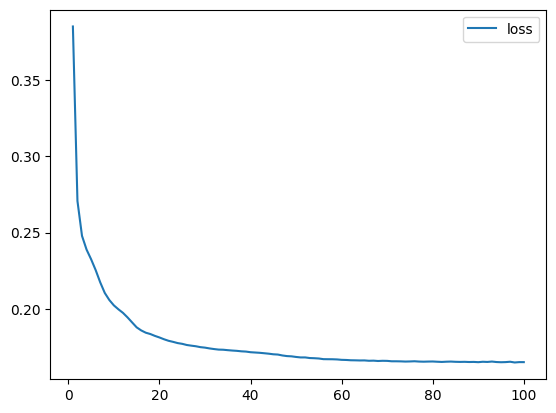

In [9]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

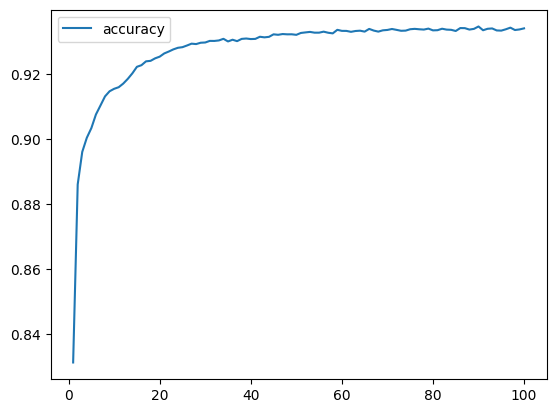

In [10]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

810/810 - 0s - loss: 0.1616 - accuracy: 0.9337 - 465ms/epoch - 575us/step
Loss: 0.1615527719259262, Accuracy: 0.9337426424026489


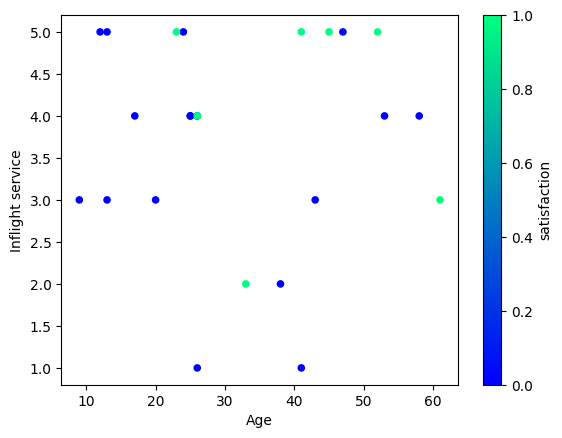

In [12]:
# plot_df = flight_df.drop(columns='satisfaction')
dummy_df.head(25).plot.scatter(x='Age', y='Inflight service', c='satisfaction', colormap='winter')
plt.show()

In [14]:
# predictions_nn = nn.predict(X_test)
# predictions_nn

# temp_test = y_test.to_numpy()
# [13, 460, 3, 4, 3, 1, 5, 3, 5, 5, 4, 3, 4,4,5, 5, 25, 18.0, 0, 1, 1] | 0
nn.test([[13, 460, 3, 4, 3, 1, 5, 3, 5, 5, 4, 3, 4,4,5, 5, 25, 18.0, 0, 1, 1]])

# results = pd.DataFrame({"Prediction": predictions_nn, "Actual": temp_test}).reset_index(drop=True)
# results.head(25)

AttributeError: 'Sequential' object has no attribute 'test'